# Sentiment analysis model

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import torch

# Loading our dataset

In [61]:
# loading reviews dataset
reviews = tf.keras.utils.text_dataset_from_directory(
    'data/train',
    batch_size=32,
    seed=123,
)
reviews.class_names

Found 25000 files belonging to 2 classes.


['neg', 'pos']

In [107]:
texts = []
labels = []
for batch, label in reviews:
    batch_texts = batch.numpy()
    batch_texts = [text.decode('utf-8') for text in batch_texts]
    labels.extend(label.numpy())
    texts.extend(batch_texts)
print(f"number of reviews: {len(texts)}")

number of reviews: 25000


# Embedding the reviews for sentiment analysis 

In [108]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
# embeddings = model.encode(texts, show_progress_bar=True , batch_size=32)

In [39]:
# save the embeddings
np.save('models/review_embeddings.npy', embeddings)
np.save('models/review_labels.npy', labels)

In [109]:
reviews_emb = np.load('models/review_embeddings.npy')
labels = np.load('models/review_labels.npy')
test_emb = np.load('models/test_embeddings.npy')
reviews_emb.shape, labels.shape

((25000, 384), (25000,))

# Building the Neural Network

In [112]:
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential  
sentiment_model = Sequential([
    Input(shape=(384,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification
])
sentiment_model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,409 (193.00 KB)

 Trainable params: 49,409 (193.00 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling and fitting our model

In [120]:
sentiment_model.compile(optimizer='adam',
              loss='binary_crossentropy', metrics=['accuracy'])
sentiment_model.fit(reviews_emb, labels, epochs=10 ,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8422 - loss: 0.3581 - val_accuracy: 0.9302 - val_loss: 0.2664
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8482 - loss: 0.3455 - val_accuracy: 0.9144 - val_loss: 0.2853
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3318 - val_accuracy: 0.8966 - val_loss: 0.3028
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8647 - loss: 0.3269 - val_accuracy: 0.8872 - val_loss: 0.3107
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8680 - loss: 0.3194 - val_accuracy: 0.8804 - val_loss: 0.3232
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8678 - loss: 0.3226 - val_accuracy: 0.8736 - val_loss: 0.3326
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8673 - loss: 0.3150 - val_accuracy: 0.8694 - val_loss: 0.3365
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.3204 - val_accuracy: 0.

In [ ]:
# # model evaluation
# test_set = tf.keras.utils.text_dataset_from_directory(
#     'data/test',
#     batch_size=32,
#     seed=123,
# )

# test_texts = []
# test_labels = []
# for batch, label in test_set:
#     batch_texts = batch.numpy()
#     batch_texts = [text.decode('utf-8') for text in batch_texts]
#     test_labels.extend(label.numpy())
#     test_texts.extend(batch_texts)
# test_embeddings = model.encode(test_texts, show_progress_bar=True , batch_size=32)

Found 25000 files belonging to 2 classes.


Batches:   0%|          | 0/782 [00:00<?, ?it/s]c:\Users\25194\Desktop\Sentiment-Analyzer\.venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 782/782 [12:21<00:00,  1.05it/s]


In [ ]:
# np.save('models/test_embeddings.npy', test_embeddings)


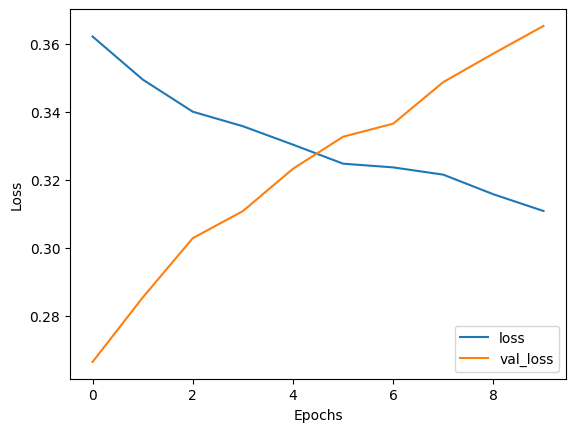

In [121]:
# plot the training history
import matplotlib.pyplot as plt
history = sentiment_model.history.history
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [122]:
# test on custom text
texts = ['i wrong this product','i love this product', 'a very bad experience', 'a great experience']
embeddings = model.encode(texts, show_progress_bar=True, batch_size=32)
predictions = sentiment_model.predict(embeddings)
print(embeddings)
print(predictions)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\25194\Desktop\Sentiment-Analyzer\.venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
Batches: 100%|██████████| 1/1 [00:00<00:00, 71.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[-0.00442658  0.02316171  0.0232179  ...  0.01262249  0.06203079
   0.04153263]
 [-0.08651585  0.08132575  0.00023941 ...  0.05201458  0.07558699
  -0.02006064]
 [-0.01738658  0.07529033  0.01241104 ... -0.02394756 -0.06441312
   0.03754763]
 [-0.05345276  0.08492634  0.03935171 ... -0.00599968 -0.05580477
   0.08646457]]
[[0.8375568 ]
 [0.8827811 ]
 [0.87320906]
 [0.9066755 ]]


In [105]:
reviews.class_names

['neg', 'pos']